# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import regularizers

In [27]:
data = pd.read_csv("compresive_strength_concrete.csv")

In [28]:
print(data.columns)

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')


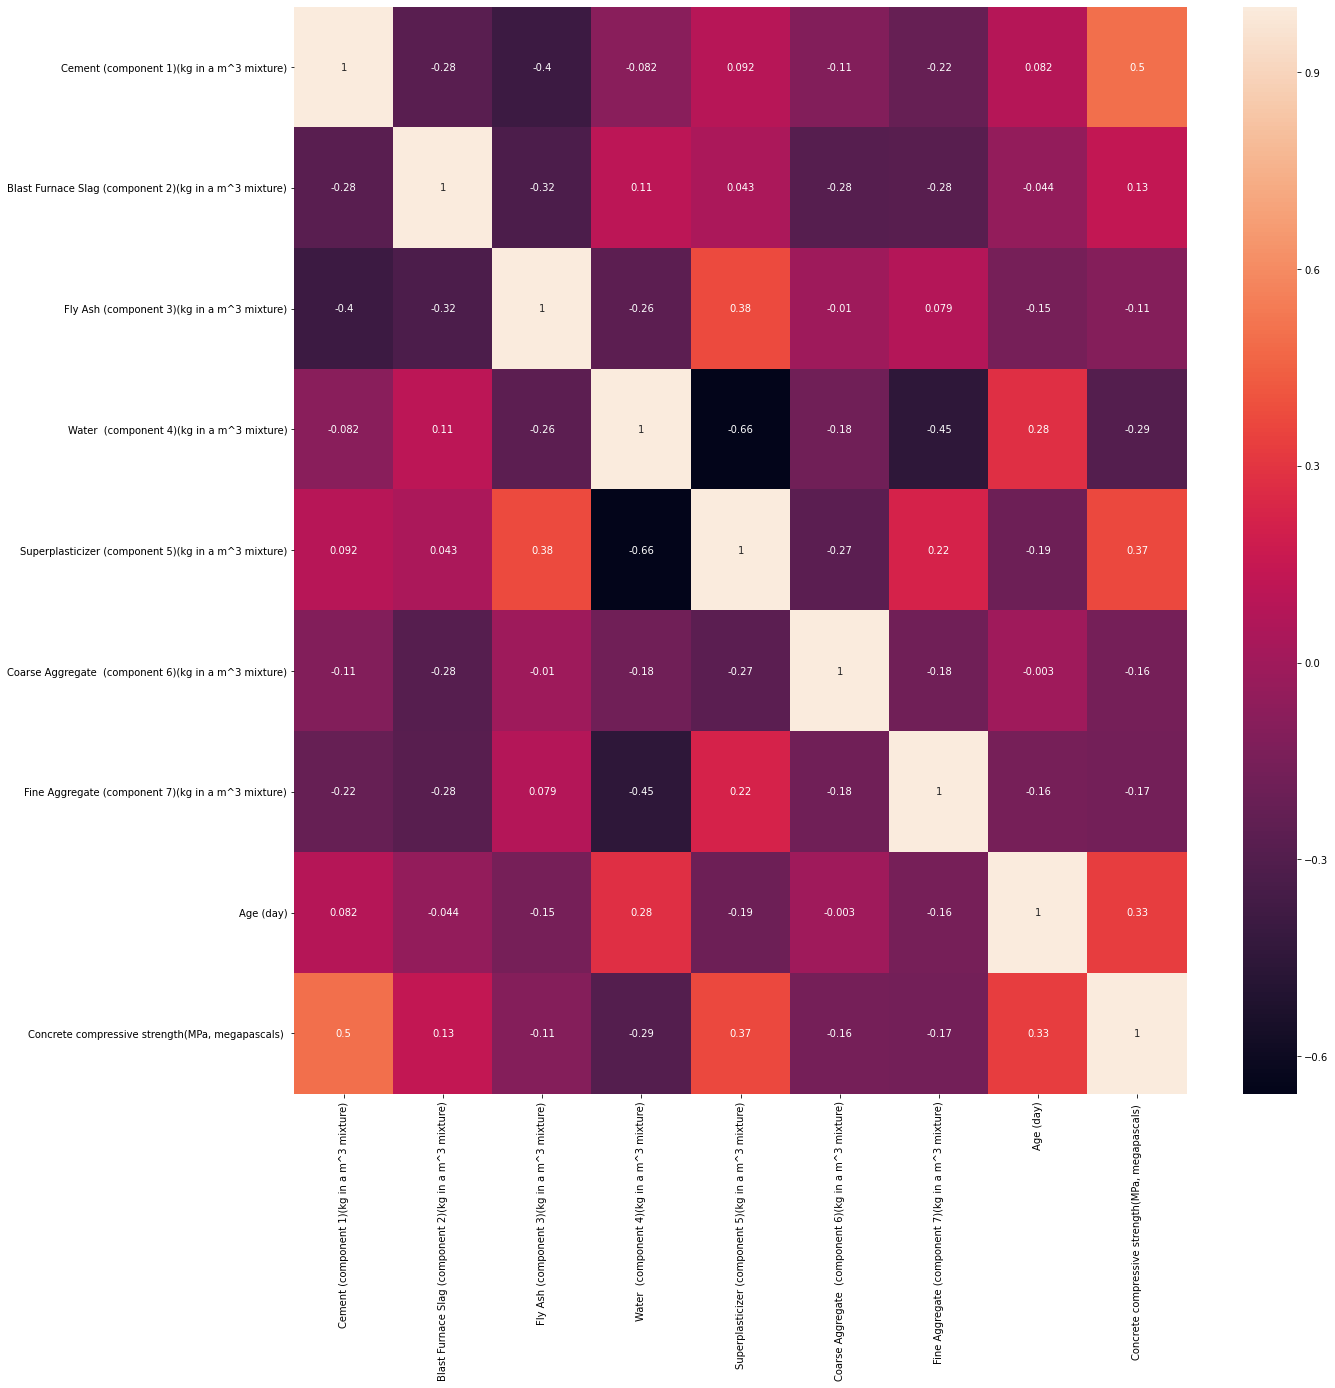

In [29]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True)

In [30]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [31]:
data_f = data.sample(frac=1)
data_f

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
903,155.0,0.0,143.0,193.0,9.0,1047.0,697.0,28,12.46
491,387.0,20.0,94.0,157.0,14.3,938.0,845.0,7,36.84
901,144.0,170.0,133.0,192.0,8.0,814.0,805.0,28,29.87
835,144.0,0.0,175.0,158.0,18.0,943.0,844.0,28,15.42
383,451.0,0.0,0.0,165.0,11.3,1030.0,745.0,28,78.80
831,154.0,144.0,112.0,220.0,10.0,923.0,658.0,28,16.50
356,277.2,97.8,24.5,160.7,11.2,1061.7,782.5,28,63.14
845,321.0,164.0,0.0,190.0,5.0,870.0,774.0,28,57.21
896,313.0,161.0,0.0,178.0,10.0,917.0,759.0,28,52.44
158,439.0,177.0,0.0,186.0,11.1,884.9,707.9,56,71.70


In [32]:
x = (data_f.loc[:, data_f.columns != 'Concrete compressive strength(MPa, megapascals) '])
y = (data_f.loc[:, data_f.columns == 'Concrete compressive strength(MPa, megapascals) '])

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.40, random_state=42)

In [34]:
mean=x_train.mean(axis=0)
x_train -= mean
std=x_train.std(axis=0)
x_train /= std

print(mean)
print(std)

x_train

Cement (component 1)(kg in a m^3 mixture)                277.943689
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     75.295728
Fly Ash (component 3)(kg in a m^3 mixture)                53.649126
Water  (component 4)(kg in a m^3 mixture)                181.955146
Superplasticizer (component 5)(kg in a m^3 mixture)        6.128544
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     972.047961
Fine Aggregate (component 7)(kg in a m^3 mixture)        774.463107
Age (day)                                                 47.953398
dtype: float64
Cement (component 1)(kg in a m^3 mixture)                100.982759
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     88.060733
Fly Ash (component 3)(kg in a m^3 mixture)                63.960352
Water  (component 4)(kg in a m^3 mixture)                 21.707665
Superplasticizer (component 5)(kg in a m^3 mixture)        5.903018
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      77.661980
Fine Aggregate (component 7)(kg i

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
682,-0.931285,0.537178,-0.838787,0.992500,-1.038205,-0.165434,0.308229,-0.304342
628,-0.771851,-0.855043,-0.838787,-0.090067,-1.038205,1.969458,0.851377,-0.304342
403,0.772967,0.496297,-0.838787,-1.011401,0.486439,1.145374,-1.417774,-0.304342
442,-0.638165,-0.855043,1.884775,-1.048254,0.943832,0.921326,-0.030937,-0.304342
854,0.089682,0.519009,0.630873,0.278466,0.486439,-0.876207,-0.947046,-0.304342
410,-1.045165,-0.700604,1.856633,-1.158814,-0.343645,0.441040,0.988975,-0.685657
582,-1.065961,0.910784,-0.838787,0.172513,-1.038205,0.702429,-0.605466,-0.304342
90,1.108668,1.291203,-0.838787,-1.660941,2.688702,-0.352141,-0.225263,-0.685657
340,0.190689,-0.855043,0.998288,-0.329614,0.571141,0.653499,-0.253024,-0.517878
738,0.178806,-0.855043,-0.838787,0.186333,-1.038205,1.518787,-0.065939,-0.624647


In [35]:
mean=x_test.mean(axis=0)
x_test -= mean
std=x_test.std(axis=0)
x_test /= std

print(mean)
print(std)

x_test

Cement (component 1)(kg in a m^3 mixture)                280.404531
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     75.337864
Fly Ash (component 3)(kg in a m^3 mixture)                55.439159
Water  (component 4)(kg in a m^3 mixture)                181.476375
Superplasticizer (component 5)(kg in a m^3 mixture)        5.994822
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     974.025890
Fine Aggregate (component 7)(kg in a m^3 mixture)        774.215858
Age (day)                                                 40.330097
dtype: float64
Cement (component 1)(kg in a m^3 mixture)                109.377887
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     86.487994
Fly Ash (component 3)(kg in a m^3 mixture)                63.500513
Water  (component 4)(kg in a m^3 mixture)                 19.218330
Superplasticizer (component 5)(kg in a m^3 mixture)        5.621715
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      77.935163
Fine Aggregate (component 7)(kg i

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
723,0.270580,-0.871079,-0.873051,0.547583,-1.066369,0.487253,0.777072,-0.206638
322,-0.286205,-0.871079,0.682842,-1.216358,1.210516,0.176738,1.598941,0.262610
122,1.724256,0.484023,-0.873051,-2.272642,4.661421,-1.564453,0.923337,-0.206638
859,-1.064242,-0.871079,2.276530,-0.024788,1.246093,-1.604230,0.999952,-0.206638
731,0.627142,-0.871079,-0.873051,0.547583,-1.066369,1.051824,0.484542,-0.625610
104,0.351035,1.585910,-0.873051,-1.341239,1.477339,-1.564453,1.479143,-0.558574
433,-1.055099,0.614676,1.207248,-0.331786,0.374473,0.407699,-0.384688,-0.206638
24,0.910563,-0.871079,-0.873051,2.420794,-1.066369,-0.539242,-1.451725,5.441097
249,-0.277977,-0.871079,0.634024,0.308228,-0.088020,-0.219745,1.211687,-0.625610
354,-0.029298,0.259714,-0.487227,-1.081071,0.925906,1.124962,0.115398,-0.625610


In [36]:
mean=x_val.mean(axis=0)
x_val -= mean
std=x_val.std(axis=0)
x_val /= std

print(mean)
print(std)

x_val

Cement (component 1)(kg in a m^3 mixture)                290.373301
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     68.233010
Fly Ash (component 3)(kg in a m^3 mixture)                53.660194
Water  (component 4)(kg in a m^3 mixture)                180.733981
Superplasticizer (component 5)(kg in a m^3 mixture)        6.709709
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     973.435922
Fine Aggregate (component 7)(kg in a m^3 mixture)        770.420874
Age (day)                                                 47.932039
dtype: float64
Cement (component 1)(kg in a m^3 mixture)                105.669228
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     81.508383
Fly Ash (component 3)(kg in a m^3 mixture)                65.108144
Water  (component 4)(kg in a m^3 mixture)                 23.481925
Superplasticizer (component 5)(kg in a m^3 mixture)        6.628829
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      78.064660
Fine Aggregate (component 7)(kg i

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
466,-0.947043,-0.837129,1.098784,-0.601909,0.481275,1.352265,0.333315,0.840042
305,-0.125612,-0.837129,0.671802,-0.857425,0.767902,0.005945,1.231000,-0.547445
297,-1.149562,-0.319391,1.084961,-0.955372,0.617046,1.375322,0.301715,0.130165
735,0.554813,-0.837129,-0.824170,0.479774,-1.012201,1.057637,0.451524,1.162713
816,2.220388,-0.837129,-0.824170,0.352016,-1.012201,1.941520,-1.842430,-0.660380
156,-0.038548,1.627648,-0.824170,-1.534541,0.677388,0.399209,0.389494,0.130165
742,1.794531,-0.837129,-0.824170,0.479774,-1.012201,-0.479550,-0.578414,0.678706
797,1.983801,-0.837129,-0.824170,0.820462,-1.012201,1.941520,-1.842430,2.130727
290,-1.025590,-0.282585,1.049635,-0.448600,0.224820,1.101191,0.120305,-0.547445
650,-1.587721,1.419081,-0.824170,0.969512,-1.012201,-0.195171,0.347360,0.678706


In [37]:
model=Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(x_train.shape[1],)))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(1))

In [38]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [39]:
history=model.fit(x_train,y_train,epochs=300,validation_data=(x_val, y_val))

Epoch 1/300
17/17 [==============================] - 1s 11ms/step - loss: 1460.0505 - mae: 34.8280 - val_loss: 1595.9788 - val_mae: 36.3183
Epoch 2/300
17/17 [==============================] - 0s 4ms/step - loss: 1485.1522 - mae: 34.9309 - val_loss: 1552.2207 - val_mae: 35.7523
Epoch 3/300
17/17 [==============================] - 0s 4ms/step - loss: 1452.4756 - mae: 34.4146 - val_loss: 1501.3092 - val_mae: 35.0796
Epoch 4/300
17/17 [==============================] - 0s 4ms/step - loss: 1386.6968 - mae: 33.9166 - val_loss: 1442.1182 - val_mae: 34.2791
Epoch 5/300
17/17 [==============================] - 0s 4ms/step - loss: 1353.9964 - mae: 32.9859 - val_loss: 1372.1533 - val_mae: 33.3021
Epoch 6/300
17/17 [==============================] - 0s 4ms/step - loss: 1243.3192 - mae: 31.5749 - val_loss: 1289.0294 - val_mae: 32.1005
Epoch 7/300
17/17 [==============================] - 0s 4ms/step - loss: 1168.2806 - mae: 30.5976 - val_loss: 1206.5496 - val_mae: 30.8417
Epoch 8/300
17/17 [=======

17/17 [==============================] - 0s 5ms/step - loss: 114.9088 - mae: 8.5620 - val_loss: 132.3396 - val_mae: 9.6161
Epoch 61/300
17/17 [==============================] - 0s 4ms/step - loss: 121.9430 - mae: 8.9589 - val_loss: 132.6935 - val_mae: 9.6221
Epoch 62/300
17/17 [==============================] - 0s 4ms/step - loss: 111.0406 - mae: 8.4934 - val_loss: 131.0591 - val_mae: 9.5620
Epoch 63/300
17/17 [==============================] - 0s 4ms/step - loss: 111.6265 - mae: 8.4557 - val_loss: 131.1219 - val_mae: 9.5590
Epoch 64/300
17/17 [==============================] - 0s 10ms/step - loss: 120.6251 - mae: 8.8983 - val_loss: 130.5754 - val_mae: 9.5418
Epoch 65/300
17/17 [==============================] - 0s 4ms/step - loss: 119.3664 - mae: 8.8631 - val_loss: 127.7985 - val_mae: 9.4269
Epoch 66/300
17/17 [==============================] - 0s 4ms/step - loss: 112.1751 - mae: 8.3057 - val_loss: 127.7561 - val_mae: 9.4277
Epoch 67/300
17/17 [==============================] - 0s 4ms

17/17 [==============================] - 0s 4ms/step - loss: 84.8141 - mae: 7.1773 - val_loss: 101.5573 - val_mae: 8.3350
Epoch 121/300
17/17 [==============================] - 0s 5ms/step - loss: 85.6996 - mae: 7.3403 - val_loss: 102.5531 - val_mae: 8.3925
Epoch 122/300
17/17 [==============================] - 0s 4ms/step - loss: 89.4008 - mae: 7.4922 - val_loss: 98.4845 - val_mae: 8.1855
Epoch 123/300
17/17 [==============================] - 0s 5ms/step - loss: 85.3883 - mae: 7.1855 - val_loss: 101.7790 - val_mae: 8.3606
Epoch 124/300
17/17 [==============================] - 0s 4ms/step - loss: 91.0014 - mae: 7.5568 - val_loss: 99.3041 - val_mae: 8.2159
Epoch 125/300
17/17 [==============================] - 0s 4ms/step - loss: 85.8180 - mae: 7.2607 - val_loss: 97.8029 - val_mae: 8.1067
Epoch 126/300
17/17 [==============================] - 0s 4ms/step - loss: 89.5339 - mae: 7.4311 - val_loss: 97.4966 - val_mae: 8.1247
Epoch 127/300
17/17 [==============================] - 0s 4ms/step

Epoch 181/300
17/17 [==============================] - 0s 4ms/step - loss: 62.2863 - mae: 6.1652 - val_loss: 75.6350 - val_mae: 6.9737
Epoch 182/300
17/17 [==============================] - 0s 4ms/step - loss: 61.9702 - mae: 6.1000 - val_loss: 74.9317 - val_mae: 6.9442
Epoch 183/300
17/17 [==============================] - 0s 4ms/step - loss: 61.2826 - mae: 5.9959 - val_loss: 73.9381 - val_mae: 6.8908
Epoch 184/300
17/17 [==============================] - 0s 4ms/step - loss: 59.2268 - mae: 5.9424 - val_loss: 76.7120 - val_mae: 7.0727
Epoch 185/300
17/17 [==============================] - 0s 4ms/step - loss: 58.6409 - mae: 5.8825 - val_loss: 74.6435 - val_mae: 6.9582
Epoch 186/300
17/17 [==============================] - 0s 4ms/step - loss: 58.5352 - mae: 6.0005 - val_loss: 75.1883 - val_mae: 6.9876
Epoch 187/300
17/17 [==============================] - 0s 4ms/step - loss: 59.6310 - mae: 5.9387 - val_loss: 74.2941 - val_mae: 6.9348
Epoch 188/300
17/17 [==============================] - 

Epoch 242/300
17/17 [==============================] - 0s 4ms/step - loss: 46.8109 - mae: 5.2033 - val_loss: 61.2613 - val_mae: 6.0948
Epoch 243/300
17/17 [==============================] - 0s 4ms/step - loss: 44.7885 - mae: 5.1075 - val_loss: 61.1634 - val_mae: 6.0929
Epoch 244/300
17/17 [==============================] - 0s 8ms/step - loss: 44.6890 - mae: 5.0495 - val_loss: 61.5491 - val_mae: 6.1114
Epoch 245/300
17/17 [==============================] - 0s 4ms/step - loss: 47.5063 - mae: 5.1461 - val_loss: 62.0621 - val_mae: 6.1577
Epoch 246/300
17/17 [==============================] - 0s 4ms/step - loss: 47.6859 - mae: 5.2475 - val_loss: 64.0243 - val_mae: 6.2944
Epoch 247/300
17/17 [==============================] - 0s 4ms/step - loss: 45.9404 - mae: 5.0516 - val_loss: 60.2990 - val_mae: 6.0126
Epoch 248/300
17/17 [==============================] - 0s 3ms/step - loss: 48.5956 - mae: 5.2672 - val_loss: 59.5564 - val_mae: 5.9395
Epoch 249/300
17/17 [==============================] - 

In [40]:
train_mae=history.history['mae']
val_mae=history.history['val_mae']

Text(0, 0.5, 'MAE')

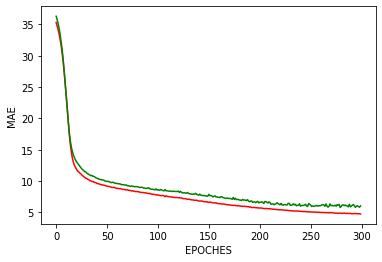

In [41]:
epochs=range(0,300)
plt.plot(epochs,train_mae,'r')
plt.plot(epochs,val_mae,'g')
plt.xlabel('EPOCHES')
plt.ylabel('MAE')

In [42]:
model.add(layers.Dense(32, activation='relu', kernel_regularizer =regularizers.l2(0.02),   input_shape=(x_train.shape[1],)))
model.add(layers.Dense(16, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
model.add(layers.Dense(8, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
model.add(layers.Dense(4, activation='relu', kernel_regularizer =regularizers.l2(0.002)))
model.add(layers.Dense(1))

In [43]:
model.compile(optimizer='rmsprop', loss='mse', metrics='mae')
history = model.fit(x_train,y_train, batch_size=16, epochs=200, validation_data=(x_val, y_val))

Epoch 1/200
33/33 [==============================] - 1s 7ms/step - loss: 1665.2213 - mae: 36.9227 - val_loss: 1700.1107 - val_mae: 37.5957
Epoch 2/200
33/33 [==============================] - 0s 3ms/step - loss: 1600.6804 - mae: 36.2554 - val_loss: 1697.0817 - val_mae: 37.5576
Epoch 3/200
33/33 [==============================] - 0s 2ms/step - loss: 1526.9628 - mae: 35.4763 - val_loss: 1669.5530 - val_mae: 37.2319
Epoch 4/200
33/33 [==============================] - 0s 3ms/step - loss: 1450.8092 - mae: 34.6699 - val_loss: 1528.6669 - val_mae: 35.5398
Epoch 5/200
33/33 [==============================] - 0s 3ms/step - loss: 1301.4985 - mae: 32.5096 - val_loss: 993.5957 - val_mae: 28.1788
Epoch 6/200
33/33 [==============================] - 0s 6ms/step - loss: 699.7326 - mae: 22.9489 - val_loss: 227.1197 - val_mae: 12.2147
Epoch 7/200
33/33 [==============================] - 0s 3ms/step - loss: 147.3624 - mae: 9.9729 - val_loss: 132.0949 - val_mae: 9.3583
Epoch 8/200
33/33 [===============

Epoch 62/200
33/33 [==============================] - 0s 3ms/step - loss: 36.4418 - mae: 4.5911 - val_loss: 49.5061 - val_mae: 5.5416
Epoch 63/200
33/33 [==============================] - 0s 4ms/step - loss: 38.3947 - mae: 4.6930 - val_loss: 60.3776 - val_mae: 6.1912
Epoch 64/200
33/33 [==============================] - 0s 3ms/step - loss: 38.0282 - mae: 4.7416 - val_loss: 49.6119 - val_mae: 5.5717
Epoch 65/200
33/33 [==============================] - 0s 4ms/step - loss: 33.2675 - mae: 4.3662 - val_loss: 72.9030 - val_mae: 6.8870
Epoch 66/200
33/33 [==============================] - 0s 4ms/step - loss: 35.7936 - mae: 4.5501 - val_loss: 49.1462 - val_mae: 5.4933
Epoch 67/200
33/33 [==============================] - 0s 4ms/step - loss: 39.7754 - mae: 4.7854 - val_loss: 50.7956 - val_mae: 5.6306
Epoch 68/200
33/33 [==============================] - 0s 4ms/step - loss: 37.6424 - mae: 4.7095 - val_loss: 55.4708 - val_mae: 5.9202
Epoch 69/200
33/33 [==============================] - 0s 4ms/s

Epoch 123/200
33/33 [==============================] - 0s 3ms/step - loss: 35.9037 - mae: 4.6286 - val_loss: 47.1178 - val_mae: 5.4286
Epoch 124/200
33/33 [==============================] - 0s 3ms/step - loss: 29.3510 - mae: 4.0668 - val_loss: 50.5041 - val_mae: 5.5702
Epoch 125/200
33/33 [==============================] - 0s 3ms/step - loss: 32.2939 - mae: 4.3912 - val_loss: 55.1460 - val_mae: 5.8069
Epoch 126/200
33/33 [==============================] - 0s 3ms/step - loss: 30.2061 - mae: 4.0885 - val_loss: 48.8891 - val_mae: 5.5455
Epoch 127/200
33/33 [==============================] - 0s 3ms/step - loss: 29.8496 - mae: 4.1682 - val_loss: 47.3507 - val_mae: 5.4345
Epoch 128/200
33/33 [==============================] - 0s 3ms/step - loss: 33.2551 - mae: 4.3528 - val_loss: 56.9073 - val_mae: 5.9109
Epoch 129/200
33/33 [==============================] - 0s 3ms/step - loss: 29.6049 - mae: 4.0717 - val_loss: 53.2988 - val_mae: 5.7244
Epoch 130/200
33/33 [==============================] - 

Epoch 184/200
33/33 [==============================] - 0s 2ms/step - loss: 27.5245 - mae: 3.9842 - val_loss: 51.3026 - val_mae: 5.6199
Epoch 185/200
33/33 [==============================] - 0s 3ms/step - loss: 29.2142 - mae: 4.0802 - val_loss: 54.5828 - val_mae: 5.8256
Epoch 186/200
33/33 [==============================] - 0s 2ms/step - loss: 30.4722 - mae: 4.1401 - val_loss: 50.7787 - val_mae: 5.5861
Epoch 187/200
33/33 [==============================] - 0s 3ms/step - loss: 29.0117 - mae: 4.0843 - val_loss: 48.6915 - val_mae: 5.5088
Epoch 188/200
33/33 [==============================] - 0s 3ms/step - loss: 29.4327 - mae: 4.0739 - val_loss: 47.3690 - val_mae: 5.4483
Epoch 189/200
33/33 [==============================] - 0s 2ms/step - loss: 31.3700 - mae: 4.2492 - val_loss: 57.3287 - val_mae: 5.9185
Epoch 190/200
33/33 [==============================] - 0s 3ms/step - loss: 32.0552 - mae: 4.1955 - val_loss: 45.4986 - val_mae: 5.3905
Epoch 191/200
33/33 [==============================] - 

In [44]:
train_mae=history.history['mae']
val_mae=history.history['val_mae']

Text(0, 0.5, 'MAE')

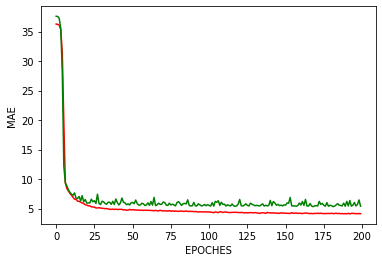

In [45]:
epochs=range(0,200)
plt.plot(epochs,train_mae,'r')
plt.plot(epochs,val_mae,'g')
plt.xlabel('EPOCHES')
plt.ylabel('MAE')

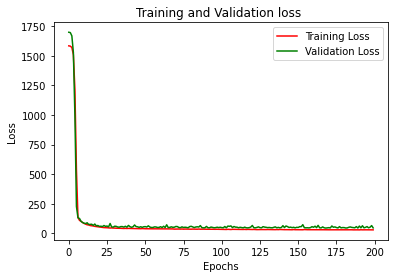

In [46]:
epochs=range(0,200)

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [47]:
a=model.predict(x_test)
print(a[0])
np.array(y_test)[0]

[32.32962]


array([27.83])

In [48]:
results = model.evaluate(x_test, y_test)
results

10/10 [==============================] - 0s 1ms/step - loss: 61.9307 - mae: 6.1987


[61.93072509765625, 6.198676109313965]